In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [99]:
def encode_job(job):
    job_copied = job.copy()
    job_copied[job_copied=='housemaid']=0
    job_copied[job_copied=='services']=1
    job_copied[job_copied=='admin']=2
    job_copied[job_copied=='blue-collar']=3
    job_copied[job_copied=='technician']=4
    job_copied[job_copied=='retired']=5
    job_copied[job_copied=='management']=6
    job_copied[job_copied=='unemployed']=7
    job_copied[job_copied=='self-employed']=8
    job_copied[job_copied=='entrepreneur']=9
    job_copied[job_copied=='student']=10
    job_copied[job_copied=='unknown']=11
    return job_copied

def encode_binary(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=0
    binary_copied[binary_copied=='yes']=1
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

In [100]:
from scipy import stats

In [101]:
inputData = pd.read_csv('/home/vignesh/Documents/MachineLearningProjectTCDVersion2/ML1819--task-102--team-18/com/tcd/vignesh_notebooks/Imputed and Pruned.csv')

In [102]:
inputData1 = inputData[inputData['job'].notnull()]

In [103]:
inputData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y', 'id'],
      dtype='object')

In [104]:
confusion_matrix = pd.crosstab(inputData1['job'],inputData1['y'])

In [105]:
stat, p, dof, expected = stats.chi2_contingency(confusion_matrix)

In [106]:
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [161]:
def chiSquareTest(df,col1,col2):
    confusion_matrix = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
#     print(confusion_matrix)
    print(stat, " ", critical," ",dof)
    if abs(stat) >= critical:
        print('Dependent (reject H0)  ' +col1+" "+col2)
    else:
        print('Independent (fail to reject H0) '+col1+" "+col2)

In [162]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

In [163]:
for c in cols:
#     print(c)
    chiSquareTest(inputData,c,'y')

974.641901130108   18.307038053275146   10
Dependent (reject H0)  job y
123.5182154837743   5.991464547107979   2
Dependent (reject H0)  marital y
187.74010103178603   12.591587243743977   6
Dependent (reject H0)  education y
406.54553552952774   5.991464547107979   2
Dependent (reject H0)  default y
5.140058672644107   3.841458820694124   1
Dependent (reject H0)  housing y
0.9509836726551537   3.841458820694124   1
Independent (fail to reject H0) loan y
859.1265969368158   3.841458820694124   1
Dependent (reject H0)  contact y
3093.1640336004252   16.918977604620448   9
Dependent (reject H0)  month y
26.210645757781155   9.487729036781154   4
Dependent (reject H0)  day_of_week y
4219.853325768575   5.991464547107979   2
Dependent (reject H0)  poutcome y


In [116]:
from sklearn import preprocessing
inputData['age1'] = preprocessing.scale(inputData['age'])

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [117]:
age_1 = inputData[inputData['y']=='yes']['age']
age_2 = inputData[inputData['y']=='no']['age']

In [118]:
import scipy.stats as stats

In [119]:
stats.f_oneway(age_1, age_2)

F_onewayResult(statistic=38.027076864153415, pvalue=7.041769932421391e-10)

In [120]:
campaign_1 = inputData[inputData['y']=='yes']['campaign']
campaign_2 = inputData[inputData['y']=='no']['campaign']

In [121]:
stats.f_oneway(campaign_1, campaign_2)

F_onewayResult(statistic=184.19224840120663, pvalue=7.251790168873897e-42)

In [122]:
cons_conf_1 = inputData[inputData['y']=='yes']['euribor3m']
cons_conf_2 = inputData[inputData['y']=='no']['euribor3m']

In [123]:
stats.f_oneway(cons_conf_1, cons_conf_2)

F_onewayResult(statistic=4292.029073632412, pvalue=0.0)

In [57]:
inputData[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,2
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,4
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5
6,59,admin,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,6
7,41,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,7
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,8
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,9


In [74]:
cons_price_1 = inputData[inputData['y']=='yes']['pdays']
cons_price_2 = inputData[inputData['y']=='no']['pdays']

In [75]:
stats.f_oneway(cons_price_1, cons_price_2)

F_onewayResult(statistic=4849.408325493487, pvalue=0.0)

(array([4.085e+03, 3.690e+02, 1.130e+02, 3.400e+01, 2.400e+01, 8.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <a list of 10 Patch objects>)

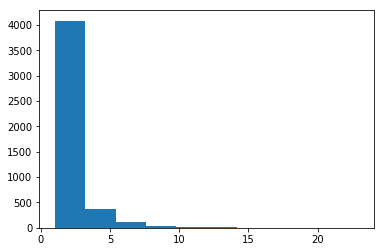

In [82]:
plt.hist(inputData[inputData['y']=='yes']['campaign'])

(array([29468.,  3881.,  1878.,   479.,   287.,   205.,   105.,    89.,
           41.,    38.]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <a list of 10 Patch objects>)

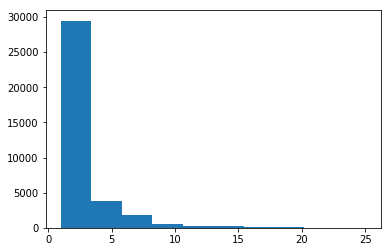

In [83]:
plt.hist(inputData[inputData['y']=='no']['campaign'])

In [158]:
from sklearn.preprocessing import MinMaxScaler

def normalize(data):
    data1 = data.copy()
    scaler = MinMaxScaler()
    scaler.fit(data1)
    return scaler.transform(data1)

def anova(df,col):
    inputData1 = inputData.copy()
    inputData1[col] = normalize(inputData1[col].values.reshape(-1,1))
    col_1 = inputData1[inputData1['y']=='yes'][col]
    col_2 = inputData1[inputData1['y']=='no'][col]
    print(col," ",stats.f_oneway(col_1, col_2))
    


In [159]:
cols_cont = ['campaign','pdays','age','euribor3m','emp.var.rate']

In [160]:
for c in cols_cont:
#     print(c)
    anova(inputData,c)

campaign   F_onewayResult(statistic=184.1922484012068, pvalue=7.251790168873897e-42)
pdays   F_onewayResult(statistic=4849.408325493488, pvalue=0.0)
age   F_onewayResult(statistic=38.027076864153415, pvalue=7.041769932421391e-10)
euribor3m   F_onewayResult(statistic=4292.029073632413, pvalue=0.0)
emp.var.rate   F_onewayResult(statistic=4006.786410889047, pvalue=0.0)


/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [172]:
inputData[['campaign','pdays','age','euribor3m','emp.var.rate']].corr()

,campaign,pdays,age,euribor3m,emp.var.rate
campaign,1.000000,0.054814,0.005985,0.135307,0.151737
pdays,0.054814,1.000000,-0.034383,0.296792,0.270885
age,0.005985,-0.034383,1.000000,0.010841,-0.000297
euribor3m,0.135307,0.296792,0.010841,1.000000,0.972217
emp.var.rate,0.151737,0.270885,-0.000297,0.972217,1.000000


In [171]:
inputData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y', 'id', 'age1'],
      dtype='object')